# Unit 5 - Financial Planning

In [103]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [47]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [84]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3



In [40]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [41]:
# Fetch current BTC price
btc_request_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_request_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_request_data['data']['1']['quotes']['USD']['price']
my_eth_value = eth_request_data['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15996.00
The current value of your 5.3 ETH is $1184.91


In [42]:
print(json.dumps(btc_request_data, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19206831,
            "id": 1,
            "last_updated": 1668401979,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 306965570681,
                    "percent_change_1h": -1.06883743287786,
                    "percent_change_24h": -5.10580838937257,
                    "percent_change_7d": -23.4897389625438,
                    "percentage_change_1h": -1.06883743287786,
                    "percentage_change_24h": -5.10580838937257,
                    "percentage_change_7d": -23.4897389625438,
                    "price": 15996.0,
                    "volume_24h": 24451898637
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19206831,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [11]:
print(json.dumps(eth_request_data, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120514695,
            "id": 1027,
            "last_updated": 1668396272,
            "max_supply": 120514695,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 143580445187,
                    "percent_change_1h": 0.225613464358533,
                    "percent_change_24h": -5.96045759926893,
                    "percent_change_7d": -24.3159650275312,
                    "percentage_change_1h": 0.225613464358533,
                    "percentage_change_24h": -5.96045759926893,
                    "percentage_change_7d": -24.3159650275312,
                    "price": 1190.47,
                    "volume_24h": 8816792016
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120514695,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [55]:
Alpaca_Key = os.getenv("ALPACA_API_KEY")

In [56]:
type(Alpaca_Key)

str

In [54]:
# Set Alpaca API key and secret
Alpaca_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    Alpaca_Key,
    Alpaca_Secret_Key,
    api_version='V2'
)

In [81]:
# Format current date as ISO format
today = pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_port = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_port[df_port['symbol']=='AGG'].drop('symbol',axis=1)

SPY = df_port[df_port['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_port = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_port

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [82]:
# Pick AGG and SPY close prices
agg_close_price = float(df_port["AGG"]["close"])
spy_close_price = float(df_port["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [83]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [90]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value

stock_bond_assets = my_agg_value + my_agg_value
# Create savings DataFrame
value_data = {
    'asset': ["crypto", "shares"],
    'amount': [crypto_assets, stock_bond_assets]
}
df_savings = pd.DataFrame(value_data).set_index('asset')
# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,17180.91
shares,47772.00


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

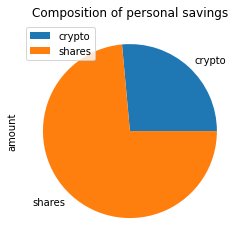

In [91]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title="Composition of personal savings")

In [93]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()


# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough in your total portfolio to create an emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this important financial goal! You have enough in your total portfolio to create an emergency fund.")
else:
    print(f"You need ${emergency_fund - total_savings:,.2f} more in your total portfolio to create an emergency fund.")

Congratulations! You have enough in your total portfolio to create an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [95]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [98]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)

SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
display (df_stock_data.head())
display (df_stock_data.tail())

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-04-26 04:00:00+00:00       13520  114.706244  417.44  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.93  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.81  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.32  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.63  418.54  416.3400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-04-26 04:00:00+00:00  417.61  51824860      295870  417.508245  
2021-04-27 04:00:00+00:00  417.52  50297139      296300  417.481360  
2021-04-28 04:00:00+00:00  417.40  50692781      330049  417.742098  
2021-04-29 04:00:00+00:00  420.06  76965583      443396  418.824046  
2021-04-30 04:00:00+00:00  417.30  84731942      478844  417.651995

In [104]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [105]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [106]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\CHD\Desktop\Mod 5 hw\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995171,1.000844,0.999438,1.008456,1.001944,0.993075,0.992801,1.004863,0.998211,0.997677,...,0.993378,0.996861,0.995144,0.993504,0.999346,1.006455,1.000351,1.003704,1.001326,0.993770
2,1.003965,0.997403,0.998266,1.009739,0.994116,0.988231,0.999290,0.999846,1.001690,0.999533,...,0.991311,0.993697,0.996108,0.988663,0.994056,1.005908,0.996919,1.012729,0.995843,1.009246
3,1.002905,1.002032,1.004280,1.019652,0.997303,0.989578,1.003034,0.997775,1.004027,1.004529,...,0.992445,0.993626,0.994024,0.990825,0.994594,1.008695,0.990655,1.022412,0.993370,1.013545
4,0.997378,0.999030,1.003194,1.015221,1.000592,0.987590,0.998305,1.004397,1.003182,1.003974,...,0.990245,0.994016,0.996832,0.988264,0.995534,1.003027,0.995189,1.027106,0.990286,1.008002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.116258,7.380968,5.874546,6.410283,4.996083,7.166775,10.200350,3.665789,9.551417,7.531318,...,4.330449,5.880620,3.838571,6.938814,10.795956,6.945176,7.950509,9.581845,5.768100,2.652137
7557,12.178481,7.367694,5.859122,6.353498,4.984275,7.156128,10.182904,3.652339,9.584637,7.481022,...,4.328766,5.836663,3.856710,7.004649,10.889243,6.916704,7.919608,9.570775,5.776385,2.635917
7558,12.209441,7.312420,5.878840,6.327591,4.973119,7.148503,10.158081,3.645921,9.536700,7.525731,...,4.339628,5.809702,3.861764,6.940653,10.847969,6.867691,7.958174,9.578958,5.734843,2.640127
7559,12.241972,7.291212,5.914095,6.298414,4.986486,7.121483,10.225425,3.622938,9.466870,7.507124,...,4.304646,5.828007,3.841697,6.915341,10.870416,6.903323,7.980303,9.627618,5.728787,2.651592


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

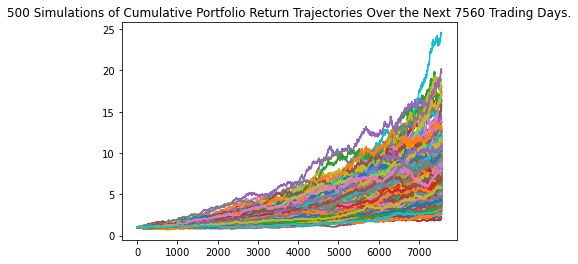

In [107]:
# Plot simulation outcomes
MC_portfolio.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

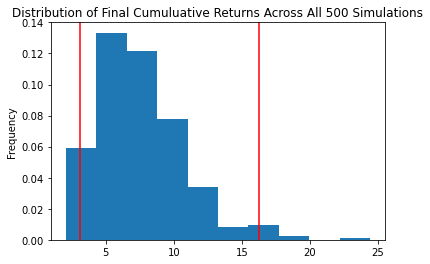

In [108]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution()

### Retirement Analysis

In [109]:
# Fetch summary statistics from the Monte Carlo simulation results
Summary_stats = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(Summary_stats)

count           500.000000
mean              7.555135
std               3.197396
min               2.070055
25%               5.152794
50%               7.091996
75%               9.369703
max              24.417157
95% CI Lower      3.132127
95% CI Upper     16.220445
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [110]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(Summary_stats[8]*initial_investment)

ci_upper = round(Summary_stats[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62643 and $324409


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [111]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Summary_stats[8]*initial_investment)

ci_upper = round(Summary_stats[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $93964 and $486613


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


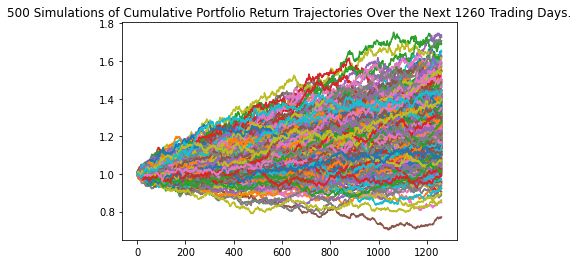

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

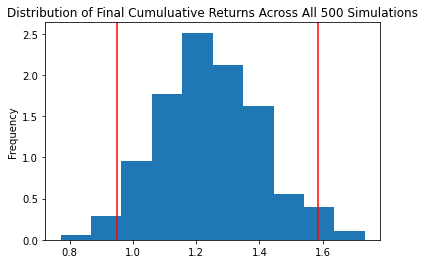

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


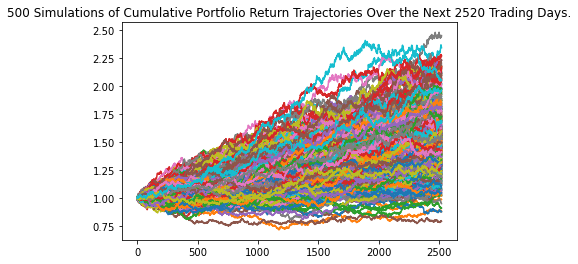

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

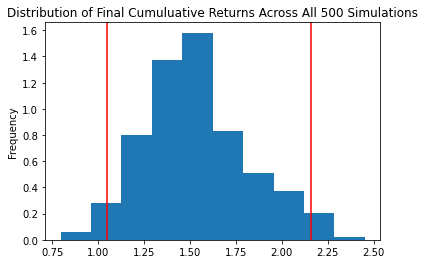

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
